In [ ]:
# Colab library to upload files to notebook
from google.colab import files

In [ ]:
# Install Kaggle library
!pip install -q kaggle


In [1]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"UserName","key":"UserKey"} # this is your kaggle api key


import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

PermissionError: [Errno 13] Permission denied: '/root/.kaggle/kaggle.json'

In [ ]:
!kaggle datasets download -d bittlingmayer/amazonreviews

 99% 489M/493M [00:04<00:00, 130MB/s]
100% 493M/493M [00:04<00:00, 128MB/s]


In [ ]:
!mkdir data_set

In [ ]:
!unzip amazonreviews.zip -d data_set

Archive:  amazonreviews.zip
  inflating: data_set/test.ft.txt.bz2  
  inflating: data_set/train.ft.txt.bz2  


In [ ]:
import numpy as np 
import pandas as pd 
import bz2
import gc
import chardet
import re
import os

In [ ]:
#train_file = bz2.BZ2File('data_set/train.ft.txt.bz2')
test_file = bz2.BZ2File('data_set/test.ft.txt.bz2')

In [ ]:
#train_file_lines = train_file.readlines()
test_file_lines = test_file.readlines()

In [ ]:
del test_file #,train_file

In [ ]:
#train_file_lines = [x.decode('utf-8') for x in train_file_lines]
test_file_lines = [x.decode('utf-8') for x in test_file_lines]

In [ ]:
#train_labels = ['neg' if x.split(' ')[0] == '__label__1' else 'pos' for x in train_file_lines]
#train_sentences = [x.split(' ', 1)[1][:-1].lower() for x in train_file_lines]

In [ ]:
test_labels = ['neg' if x.split(' ')[0] == '__label__1' else 'pos' for x in test_file_lines]
test_sentences = [x.split(' ', 1)[1][:-1].lower() for x in test_file_lines]

In [ ]:
import pandas as pd

In [ ]:
#df_train = pd.DataFrame({'text':train_sentences,'label':train_labels}, columns=['text','label'])
df_test = pd.DataFrame({'text':test_sentences,'label':test_labels}, columns=['text','label'])

In [ ]:
df_test.head()

,text,label
0,great cd: my lovely pat has one of the great v...,pos
1,one of the best game music soundtracks - for a...,pos
2,batteries died within a year ...: i bought thi...,neg
3,"works fine, but maha energy is better: check o...",pos
4,great for the non-audiophile: reviewed quite a...,pos


In [ ]:
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


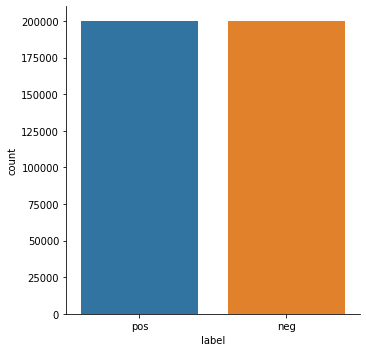

In [ ]:
sns.catplot(x='label', kind='count', data=df_test)

In [ ]:
#df_train.to_csv('data_set/train.csv', index=False)
df_test.to_csv('data_set/test.csv', index=False)

In [ ]:
!ls -a data_set

.  ..  test.csv  test.ft.txt.bz2  train.ft.txt.bz2


In [ ]:
del df_test #, df_train
#del train_labels, train_sentences
del test_labels, test_sentences
#del train_file_lines, test_file_lines

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchtext import data, datasets
import numpy as np
import pandas as pd
import random

In [ ]:
SEED = 1234 
torch.manual_seed(SEED) 
torch.backends.cudnn.deterministic = True

TEXT = data.Field(tokenize = 'spacy') 
LABEL = data.LabelField(dtype = torch.float)

In [ ]:
fields = [('text', TEXT), ('label', LABEL)]

In [ ]:
train_data = data.TabularDataset(
                                        path = 'data_set/test.csv',
                                        format = 'csv',
                                        fields = fields,
                                        skip_header = True
)

In [ ]:
print(f'Number of training examples: {len(train_data)}')
#print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 400000


In [ ]:
print(vars(train_data.examples[0]))

{'text': ['great', 'cd', ':', 'my', 'lovely', 'pat', 'has', 'one', 'of', 'the', 'great', 'voices', 'of', 'her', 'generation', '.', 'i', 'have', 'listened', 'to', 'this', 'cd', 'for', 'years', 'and', 'i', 'still', 'love', 'it', '.', 'when', 'i', "'m", 'in', 'a', 'good', 'mood', 'it', 'makes', 'me', 'feel', 'better', '.', 'a', 'bad', 'mood', 'just', 'evaporates', 'like', 'sugar', 'in', 'the', 'rain', '.', 'this', 'cd', 'just', 'oozes', 'life', '.', 'vocals', 'are', 'jusat', 'stuunning', 'and', 'lyrics', 'just', 'kill', '.', 'one', 'of', 'life', "'s", 'hidden', 'gems', '.', 'this', 'is', 'a', 'desert', 'isle', 'cd', 'in', 'my', 'book', '.', 'why', 'she', 'never', 'made', 'it', 'big', 'is', 'just', 'beyond', 'me', '.', 'everytime', 'i', 'play', 'this', ',', 'no', 'matter', 'black', ',', 'white', ',', 'young', ',', 'old', ',', 'male', ',', 'female', 'everybody', 'says', 'one', 'thing', '"', 'who', 'was', 'that', 'singing', '?', '"'], 'label': 'pos'}


In [ ]:
train_data, valid_data= train_data.split(random_state = random.seed(SEED))

In [ ]:
valid_data, test_data = valid_data.split(random_state = random.seed(SEED))

In [ ]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 280000
Number of validation examples: 84000
Number of testing examples: 36000


In [ ]:
MAX_VOCAB_SIZE = 100000

# build the vocabulary on our datas
#TEXT.build_vocab(train_data, max_size = MAX_VOCAB_SIZE)


# use this one if want to use better embedding method it uses glove
TEXT.build_vocab(train_data, 
                 max_size = MAX_VOCAB_SIZE, 
                 vectors = "glove.6B.200d", 
                 unk_init = torch.Tensor.normal_)


LABEL.build_vocab(train_data)

.vector_cache/glove.6B.zip: 862MB [06:28, 2.22MB/s]                          
100%|█████████▉| 399229/400000 [00:27<00:00, 14764.36it/s]

In [ ]:
print(f"Unique tokens in TEXT vocabulary: {len(TEXT.vocab)}")
print(f"Unique tokens in LABEL vocabulary: {len(LABEL.vocab)}")

Unique tokens in TEXT vocabulary: 100002
Unique tokens in LABEL vocabulary: 2


In [ ]:
# print all the labels
print(LABEL.vocab.stoi)

defaultdict(<function _default_unk_index at 0x7f85ba383bf8>, {'neg': 0, 'pos': 1})


In [ ]:
# print 20 most common text vocabulary
print(TEXT.vocab.freqs.most_common(20))

[('.', 1154137), ('the', 1103728), (',', 795017), ('i', 627125), ('and', 598144), ('a', 558247), ('to', 536433), ('it', 495415), ('of', 441118), ('this', 405913), ('is', 394383), (':', 302786), ('in', 257578), ('for', 246061), ('!', 230782), ('that', 225025), ('was', 194573), ('you', 192227), ('not', 186662), ('"', 182002)]


In [ ]:
BATCH_SIZE = 64
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE,
    sort=False,
    #sort_key = lambda x: len(x.comment_text),

    device = device)

In [ ]:
# create the model 
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        
        self.convs = nn.ModuleList([
                                    nn.Conv2d(in_channels = 1, 
                                              out_channels = n_filters, 
                                              kernel_size = (fs, embedding_dim)) 
                                    for fs in filter_sizes
                                    ])
        
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        
        #text = [sent len, batch size]

        # torch.permute is use to swap the axis
        text = text.permute(1, 0)
                
        #text = [batch size, sent len]
        
        embedded = self.embedding(text)
                
        #embedded = [batch size, sent len, emb dim]
        
        embedded = embedded.unsqueeze(1)
        
        #embedded = [batch size, 1, sent len, emb dim]
        
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
            
        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]]
        
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        
        #pooled_n = [batch size, n_filters]
        
        cat = self.dropout(torch.cat(pooled, dim = 1))

        #cat = [batch size, n_filters * len(filter_sizes)]
            
        return self.fc(cat)

In [ ]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 200
N_FILTERS = 100
FILTER_SIZES = [2,3,4]
OUTPUT_DIM = 1 # for just binary classification
# OUTPUT_DIM = len(LABEL.vocab) # for multiclass classification uncomment this
DROPOUT = 0.3
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)
print('INPUT_DIM:',INPUT_DIM,"\nEMBEDDING_DIM:",EMBEDDING_DIM,"\nN_FILTERS:",N_FILTERS,"\nFILTER_SIZES:",FILTER_SIZES,"\nOUTPUT_DIM:",OUTPUT_DIM,"\nPAD_IDX:",PAD_IDX)

INPUT_DIM: 100002 
EMBEDDING_DIM: 200 
N_FILTERS: 100 
FILTER_SIZES: [2, 3, 4] 
OUTPUT_DIM: 1 
PAD_IDX: 1


In [ ]:
print(TEXT.vocab.stoi[TEXT.pad_token])

1


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 20,181,001 trainable parameters


In [ ]:
pretrained_embeddings = TEXT.vocab.vectors
print(pretrained_embeddings)
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.1117, -0.4966,  0.1631,  ..., -1.8542,  0.4022,  0.4238],
        [ 0.2078,  1.1879, -0.7320,  ...,  1.3663, -0.4598,  0.6668],
        [ 0.1229,  0.5804, -0.0696,  ..., -0.0392, -0.1624, -0.0967],
        ...,
        [ 0.1589, -0.4828,  0.2063,  ...,  0.3581, -0.3142, -0.2211],
        [ 0.4979,  1.2720, -2.0297,  ...,  0.4564, -0.1406, -1.9060],
        [ 0.0905, -0.4785,  0.1473,  ...,  0.4376,  1.3531,  0.2133]])


tensor([[-0.1117, -0.4966,  0.1631,  ..., -1.8542,  0.4022,  0.4238],
        [ 0.2078,  1.1879, -0.7320,  ...,  1.3663, -0.4598,  0.6668],
        [ 0.1229,  0.5804, -0.0696,  ..., -0.0392, -0.1624, -0.0967],
        ...,
        [ 0.1589, -0.4828,  0.2063,  ...,  0.3581, -0.3142, -0.2211],
        [ 0.4979,  1.2720, -2.0297,  ...,  0.4564, -0.1406, -1.9060],
        [ 0.0905, -0.4785,  0.1473,  ...,  0.4376,  1.3531,  0.2133]])

In [ ]:
#Then zero the initial weights of the unknown and padding tokens.
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [ ]:
#weight_decay=0.01
optimizer = optim.Adam(model.parameters(),lr=0.00001)

#criterion = nn.CrossEntropyLoss() #for multi-class uncomment this
criterion = nn.BCEWithLogitsLoss() # for two class

model = model.to(device)
criterion = criterion.to(device)

In [ ]:
# use for two class classification
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [ ]:
# use for multiple class classification
def categorical_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    max_preds = preds.argmax(dim = 1, keepdim = True) # get the index of the max probability
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / torch.FloatTensor([y.shape[0]])

In [ ]:
def train(model, iterator, optimizer, criterion):    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
                
        predictions = model(batch.text).squeeze(1)
        
        loss = criterion(predictions, batch.label)
        
        acc = binary_accuracy(predictions, batch.label) # for binary class
        #acc = categorical_accuracy(predictions, batch.label) # for multiclass uncomment this
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.text).squeeze(1)
            
            loss = criterion(predictions, batch.label)
            
            acc = binary_accuracy(predictions, batch.label) # for two class
            #acc = categorical_accuracy(predictions, batch.label) # for mlticlass uncomment this

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
best_valid_loss = float('inf')

In [ ]:
N_EPOCHS = 1



for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut5-model2.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 1m 43s
	Train Loss: 0.134 | Train Acc: 95.10%
	 Val. Loss: 0.185 |  Val. Acc: 92.93%


In [ ]:
model.load_state_dict(torch.load('tut5-model2.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.190 | Test Acc: 93.18%


In [ ]:
import spacy
nlp = spacy.load('en')

def predict_class(model, sentence, min_len = 4):
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    if len(tokenized) < min_len:
        tokenized += ['<pad>'] * (min_len - len(tokenized))
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(1)
    preds = torch.sigmoid(model(tensor))
    #max_preds = preds.argmax(dim = 1) # for multiclass
    return preds[0][0]#round(float(preds[0][0]))

In [ ]:
predict_class(model, "You look at this laptop and think nah it's not that great looking no way I can play 144hz gameplay on this but when you look at the specifications you get blown away. Rtx2080 with Intel i9 processor and on top of that 144hz display panel. Only down side with this machine is it's speakers and design. Apart from that, on performance it's a beast. I would totally recommend it for gaming.")

tensor(0.1273, device='cuda:0', grad_fn=<SelectBackward>)

In [ ]:
pred_class = round(float(predict_class(model, "Only down side with this machine is it's speakers and design. Apart from that, on performance it's a beast. I would totally recommend it if you are not into aesthetics that much.")))
print(f'Predicted class is: {pred_class} = {LABEL.vocab.itos[pred_class]}')

Predicted class is: 1 = pos


In [ ]:
torch.save(TEXT.vocab,'vocab.pt')

In [ ]:
torch.save(LABEL.vocab, 'label.pt')